# Telecom X

## Extracción

In [179]:
# Librerias
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

In [138]:
# Datos
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# DataFrame
df = pd.read_json(url)

# Revisión
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [139]:
# Columnas del dataset
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [140]:
# Columnas no normalizadas
normal = df.columns[2:]

# Normalización y unión con el dataframe
for i in range(len(normal)):
    norm = pd.json_normalize(df[normal[i]])
    print(norm.shape)
    df.drop(normal[i], axis=1, inplace=True)
    df = df.join(norm)

# Revisión
df.head()

(7267, 5)
(7267, 2)
(7267, 7)
(7267, 5)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Transformación

### Conozca el conjunto de datos

In [141]:
# Columnas del dataset
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [142]:
# Tipos de datos del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


**Diccionario de datos**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

**Columnas más relevantes para el análisis:**
1. `customerID`: Esta columna es para identificar al cliente de forma unica
2. `Churn`: Es la que nos indica si el cliente abandono o no
3. `ternure`: Nos dice por cuanto tiempo el cliente estuvo en la empresa
4. `PhoneService`: Columna para conocer las preferencias del cliente
5. `InternetService`: Columna para conocer las preferencias del cliente
6. `TechSupport`: Columna para conocer las preferencias del cliente
7. `StreamingTV`: Columna para conocer las preferencias del cliente
8. `StreamingMovies`: Columna para conocer las preferencias del cliente
9. `Contract`: El tipo de contrato que tiene el cliente
10. `Charges.Monthly`: Total de los servicios del cliente, para conocer su facturación
11. `Charges.Total`: Todo lo que gastó el cliente en los servicios

### Comprobación de incoherencias en los datos

In [143]:
# Revisión de datos duplicados
df.duplicated().sum()

np.int64(0)

In [144]:
# Revisión de datos nulos y de tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [145]:
# Estadísticas de datos categóricos
df.describe(include=["O"])

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [146]:
# Revisión de columnas importantes
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [147]:
df["InternetService"].value_counts()

InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

In [148]:
df["TechSupport"].value_counts()

TechSupport
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64

In [149]:
df["StreamingTV"].value_counts()

StreamingTV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64

In [150]:
df["StreamingMovies"].value_counts()

StreamingMovies
No                     2870
Yes                    2816
No internet service    1581
Name: count, dtype: int64

In [151]:
df["Contract"].value_counts()

Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

In [152]:
df["Charges.Total"].head()

0      593.3
1      542.4
2     280.85
3    1237.85
4      267.4
Name: Charges.Total, dtype: object

In [153]:
df[["tenure", "Charges.Monthly"]].describe()

,tenure,Charges.Monthly
count,7267.000000,7267.000000
mean,32.346498,64.720098
std,24.571773,30.129572
min,0.000000,18.250000
25%,9.000000,35.425000
50%,29.000000,70.300000
75%,55.000000,89.875000
max,72.000000,118.750000


### Manejo de inconsistencias

In [162]:
# Reemplazo de datos inconsistentes con la moda
print(df["Churn"].mode())
df["Churn"] = df["Churn"].apply(lambda x: "No" if (x != "Yes") & (x != "No") else x)
df["Churn"].value_counts()

0    No
Name: Churn, dtype: object


Churn
No     5398
Yes    1869
Name: count, dtype: int64

In [163]:
# Convertir columna categórica a numérica
df["Charges.Total"] = df["Charges.Total"].str.strip().replace("", "0")
df["Charges.Total"] = df["Charges.Total"].astype(np.float64)
df["Charges.Total"].head()

0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: Charges.Total, dtype: float64

In [164]:
df[["tenure", "Charges.Monthly", "Charges.Total"]].describe()

,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035
std,24.571773,30.129572,2268.648587
min,0.000000,18.250000,0.000000
25%,9.000000,35.425000,396.200000
50%,29.000000,70.300000,1389.200000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


In [180]:
num_col = ["tenure", "Charges.Monthly", "Charges.Total"]

print("Kurtosis de columnas numéricas importantes el dataset (para identificar atípicos)")

for i in num_col:
    print(f"Columna {i}: {df[i].kurtosis()}")

Kurtosis de columnas numéricas importantes el dataset (para identificar atípicos)
Columna tenure: -1.3889808474365166
Columna Charges.Monthly: -1.2615115235678378
Columna Charges.Total: -0.22733025208576452


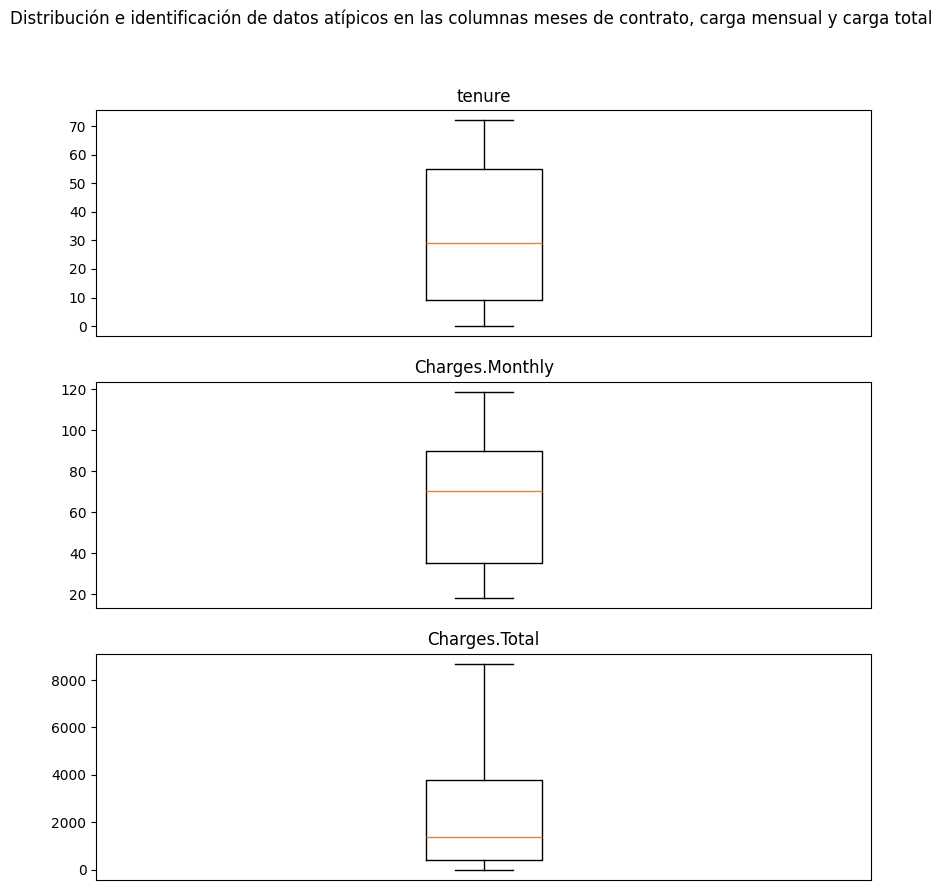

In [192]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle("Distribución e identificación de datos atípicos en las columnas meses de contrato, carga mensual y carga total")
for i in range(len(num_col)):
    ax[i].boxplot(df[num_col[i]])
    ax[i].set_title(num_col[i])
    ax[i].xaxis.set_visible(False)

### Columna de cuentas diarias

In [196]:
df["Cuentas_Diarias"] = df["Charges.Monthly"]/30
df["Cuentas_Diarias"].head(5)

0    2.186667
1    1.996667
2    2.463333
3    3.266667
4    2.796667
Name: Cuentas_Diarias, dtype: float64